# Exam/Project  
## MSc AIS July 2020
## Deadline July, 30, 23h59.
### A simple example  of a gradient descent method  by hand (batch  method)

#  PATIL Kunal

In [112]:
import numpy as np
import random
import sklearn
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

### We're going to solve a  Least Squares Problem with a cost function defined as following: 

In [5]:
%%latex
$$J(\Theta)=\frac{1}{2*m} \sum_{i=1}^{m} (h_\Theta(x_i)−y_i)^2$$

<IPython.core.display.Latex object>

### where 
### i) x_i is the ith sample
### ii) m is the total number of training examples 
#### and hθ(x(i)) is the hypothesis function defined like this:

In [6]:
%%latex
$$h_\Theta(x_i)=\Theta_0  + \Theta_1 x_i$$
###### Constant (intercept) and Slope

<IPython.core.display.Latex object>

In [198]:
def Gradient_Method(alpha, x, y, eps=0.0001, max_iter=1000, steps=10):
    HasConverged = False
    iter = 0
    m = x.shape[0] # number of samples

    print("Number of Samples:", m)

    # initial value for theta  : chosen randomly
    # Theta=(Theta0[0],Theta1[0]) in IR^2
    # Theta0[0] -> t0 in IR
    # Theta1[0] -> t1 in IR
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])
    print("Initial Value of Thetao[0] =", t0)
    print("Initial Value of Theta1[0] =", t1)

    # The total error, J(theta)  is defined as
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
    print("Total Initial Error J: ", J)

    # The Iteration Loop
    while not HasConverged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        # following: 
        
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # We update the theta_temp
        temp0 = t0 - alpha * grad0        
        temp1 = t1 - alpha * grad1


        # We update theta
        t0 = temp0
        t1 = temp1

        # We compute Mean Squared Error
        e = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)]) 

        if abs(J-e) <= eps:
            print('Converged, iterations: ', iter)
            HasConverged = True
            
        if (iter % steps ==0): print("Iter: ", iter, 
                                     " Error:",e, 
                                     " J-e:",abs(J-e))    
    
        J = e      # We update error 
        iter += 1  # We update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1

In [445]:
if __name__ == '__main__':

#   We create the Data     
    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    print('x.shape = %s y.shape = %s' %(x.shape, y.shape))
    
# We choose some hyperparameters  
    alpha = 0.2 # learning rate
    ep = 0.01 # convergence criteria

x.shape = (100, 1) y.shape = (100,)


Number of Samples: 100
Initial Value of Thetao[0] = [0.24322514]
Initial Value of Theta1[0] = [0.99156682]
Total Initial Error J:  [320903.52799641]
Iter:  0  Error: [260888.04008634]  J-e: [60015.48791007]
Iter:  25  Error: [139898.85563137]  J-e: [5.94314904]
Iter:  50  Error: [139879.10221092]  J-e: [0.01926749]
Converged, iterations:  54
Computed value
Theta0 = [-3.02146703]       Theta1 = [42.81762957]
Intercept = -2.8496363946075403 Slope = 43.20424388023939
Error on Slope [0.38661431]
Error on Intercept [0.17183064]


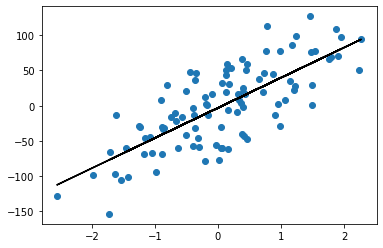

Well Done!
Wall time: 316 ms


In [446]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1
theta0, theta1 = Gradient_Method(alpha, x, y, ep, max_iter=1000,
                                     steps=25)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 

# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0)
    
# We plot  the data and the line we have computed, i.e.: Y= Theta0 + Theta1 * X
for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

pylab.plot(x,y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()
print("Well Done!")

## Some remarks
#### I have chosen the function  Gradient_Method because: 
#### it is not really well written, so it can be improved
#### First the initial value of  Theta0 and Theta1 are chosen strictly randomly, which is the worst case we can do. We can do a better choice.
#### Second, the "gradient"  is computed with the full dataset (i.e. the full set of avalaible data), which has a hugh cost again, we can do better, at least initially. 

## Idea: when you will have your code, 
## try different (and growing) values of m (number of samples). And use %%time to compare
## Examples: 
### (Small): m=100, m=1000, m=5000 (quite quick)
### (Medium): m=100000, m=200000, m=500000  (become slow)
### (Large): m=1000000, m=2000000, m=10000000 (can be very slow, be careful)

# Exercice 1
#### Here we choose really randomly the inital  value of Theta0 and Theta1, they are ### what we call Theta0[0] and Theta1[0] in the classical iterative algorithms 
####(Theta0[i+1] ,Theta1[i+1])=(Theta0[i] ,Theta1[i]) - Lambda * Grad(F(Theta0[i] ,Theta1[i]))

#### Propose another method, fast, efficient and usefull (i.e. with a low complexity)
#### Implement it, test it, justify it (here)
#### Please call your function Gradient_Method_Ex1

## Computations without Changing anything:

| Sample  | Theta 0 Ini | Theta 1 Ini | Theta 0 Fin  | Theta 1 Fin | Steps | eps  | alpha | time    | Error    | J minus E | Ini J    | Iter |
| ------- | ----------- | ----------- | ------------ | ----------- | ----- | ---- | ----- | ------- | -------- | --------- | -------- | ---- |
| 100     | 0.69677183  | 0.50446904  | \-2.81902057 | 43.13937829 | 25    | 0.01 | 0.01  | 864ms   | 139860.8 | 0.014     | 325171.3 | 643  |
| 1000    | 0.19175141  | 0.63705183  | 0.89824038   | 81.96178564 | 25    | 0.01 | 0.01  | 10.3s   | 1205909  | 0.01418   | 7661495  | 844  |
| 10000   | 0.27220497  | 0.67021344  | \-0.30422893 | 9.24977633  | 25    | 0.01 | 0.01  | 1 m 23s | 12266130 | 0.015277  | 12990605 | 722  |
| 100000  | 0.7876183   | 0.91829285  | 0.20800278   | 79.3211362  | 25    | 0.01 | 0.01  | 22m 30s | 1.23E+08 | 0.015248  | 7.34E+08 | 1047 |
| 1000000 | NC          | NC          | NC           | NC          | 25    | 0.01 | 0.01  | \>4hr   | NC       | NC        | NC       | NC   |


### TRIALS: (Random Theta values)

#### Trial 1: Adding 1/2 in J(theta) equation			
| Sample  | Theta 0 Ini | Theta 1 Ini | Theta 0 Fin  | Theta 1 Fin | Steps | eps  | alpha | time   | Error    | J minus E | Ini J    | Iter |
| ------- | ----------- | ----------- | ------------ | ----------- | ----- | ---- | ----- | ------ | -------- | --------- | -------- | ---- |
| 100     | 0.26423659  | 0.8329894   | \-2.8399727  | 43.1868806  | 25    | 0.01 | 0.01  | 187ms  | 139864.2 | 0.953441  | 16113369 | 73   |
| 1000    | 0.78457948  | 0.00230946  | 0.90321327   | 81.97729987 | 25    | 0.01 | 0.01  | 1.26s  | 1205910  | 0.297354  | 3.88E+09 | 92   |
| 10000   | 0.76362757  | 0.09555822  | \-0.30386276 | 9.25493195  | 25    | 0.01 | 0.01  | 9.58s  | 12266130 | 0.03086   | 6.55E+10 | 81   |
| 100000  | 0.6993037   | 0.89488509  | 0.20796707   | 79.32271831 | 25    | 0.01 | 0.01  | 2m 24s | 1.23E+08 | 0.091903  | 3.67E+13 | 111  |
| 1000000 | NC          | NC          | NC           | NC          | 25    | 0.01 | 0.01  | \>2hr  | NC       | NC        | NC       | NC   |

###### Can see decrease in number of iterations and required time as compared to given case computation above but still for higher number of samples time complexity was greater.

#### Trial 2: Adding 1/2 in J(theta) equation and 1/2m in grad equation			
| Sample  | Theta 0 Ini | Theta 1 Ini | Theta 0 Fin  | Theta 1 Fin | Steps | eps  | alpha | time         | Error    | J minus E | Ini J    | Iter |
| ------- | ----------- | ----------- | ------------ | ----------- | ----- | ---- | ----- | ------------ | -------- | --------- | -------- | ---- |
| 100     | 0.09677304  | 0.67187717  | \-2.83551289 | 43.17685846 | 25    | 0.01 | 0.01  | 292ms        | 139860.6 | 0.052189  | 161819.8 | 142  |
| 1000    | 0.98845101  | 0.09647489  | 0.90225831   | 81.97431877 | 25    | 0.01 | 0.01  | 2.23s        | 1205909  | 0.019245  | 3876505  | 182  |
| 10000   | 0.33200292  | 0.27307335  | \-0.30399664 | 9.25393412  | 25    | 0.01 | 0.01  | 19.1s        | 12266130 | 0.022888  | 6529845  | 159  |
| 100000  | 0.13108116  | 0.57314066  | 0.20796755   | 79.32239664 | 25    | 0.01 | 0.01  | 4m 50s       | 1.23E+08 | 0.082243  | 3.7E+08  | 221  |
| 1000000 | NC          | NC          | NC           | NC          | 25    | 0.01 | 0.01  | Not Computed | NC       | NC        | NC       | NC   |

###### Decrease in number of iterations and required time as compared to given case computation but time as well as number of iterations were approx twice from trial 1.

#### Trial 3: Implementing Stochastic gradient descent method (alpha = 0.1)

| Sample | Theta 0 Ini | Theta 1 Ini | Theta 0 Fin  | Theta 1 Fin | Steps | eps  | alpha | time  | Error    | J minus E | Ini J    | Iter |
| ------ | ----------- | ----------- | ------------ | ----------- | ----- | ---- | ----- | ----- | -------- | --------- | -------- | ---- |
| 100    | 0.41820816  | 0.66624716  | \-2.93550066 | 43.0088309  | 25    | 0.01 | 0.1   | 269ms | 139865.5 | 0.077908  | 323724.4 | 94   |
| 1000   | 0.06467464  | 0.50666308  | 0.88241652   | 81.98624243 | 25    | 0.01 | 0.1   | 1.66s | 1205911  | 0.506662  | 7681474  | 92   |
| 10000  | 0.45631235  | 0.63151107  | \-0.30913241 | 9.25612137  | 25    | 0.01 | 0.1   | 16.2s | 12266130 | 0.029617  | 13000157 | 79   |
| 100000 | 0.13131007  | 0.07067743  | 0.20632711   | 79.32273849 | 25    | 0.01 | 0.1   | 4m 8s | 1.23E+08 | 0.250569  | 7.48E+08 | 116  |

###### With change in alpha value from 0.01 to 0.1, better results observed at 0.1. Though complexity remain unchanged as for trial 2, but number of iterations decreased to half for each dataset.

#### Trial 4: Implementing Stochastic gradient descent method (alpha = 0.2)

| Sample | Theta 0 Ini | Theta 1 Ini | Theta 0 Fin  | Theta 1 Fin | Steps | eps  | alpha | time   | Error    | J minus E | Ini J    | Iter |
| ------ | ----------- | ----------- | ------------ | ----------- | ----- | ---- | ----- | ------ | -------- | --------- | -------- | ---- |
| 100    | 0.01284637  | 0.12560546  | \-2.84283898 | 43.1929847  | 25    | 0.01 | 0.2   | 154ms  | 139862   | 1.023874  | 28.60349 | 36   |
| 1000   | 0.46746621  | 0.95911915  | 0.90425964   | 81.9803357  | 25    | 0.01 | 0.2   | 686ms  | 1205999  | 47.90874  | 3228.657 | 46   |
| 10000  | 0.49961333  | 0.02967459  | \-0.30387266 | 9.25568592  | 25    | 0.01 | 0.2   | 5.15s  | 12266140 | 5.615929  | 9734.549 | 40   |
| 100000 | 0.87006852  | 0.61139427  | 0.20796283   | 79.32295089 | 25    | 0.01 | 0.2   | 1m 24s | 1.23E+08 | 0.051426  | 53801.19 | 54   |

###### With change in alpha from 0.1 to 0.2, again better results obtained at 0.2. Number of iterations were less but for higher samples (10000000) the time required was almost more than 5 hrs (whole night). With increase in learning rate for large samples, the chances of bouncing steps could be possible.

### Proposed Methods: (Fix Theta value = 1 )

#### Using Numpy
##### Instead of doing summation of the samples in dataset, using dot product in numpy which gives more faster computation. As x.shape is (m, 1) and y is (m,)
##### To match the dimensions for dot product, we add another column at first position in x array.
##### Total Error is calculated with batch method and after getting the gradient value with batch method only we are calculating mean square error.

| Sample   | Theta 0 Ini | Theta 1 Ini | Theta 0 Fin  | Theta 1 Fin | Steps | eps  | alpha | time   | Error    | J minus E | Ini J    | Iter |
| -------- | ----------- | ----------- | ------------ | ----------- | ----- | ---- | ----- | ------ | -------- | --------- | -------- | ---- |
| 100      | 1           | 1           | \-2.54148803 | 42.24628171 | 25    | 0.01 | 0.01  | 128ms  | 700.0854 | 0.015733  | 1604.873 | 373  |
| 1000     | 1           | 1           | 0.71293834   | 80.97454472 | 25    | 0.01 | 0.01  | 201ms  | 603.7451 | 0.015449  | 3804.711 | 448  |
| 10000    | 1           | 1           | \-0.19251681 | 8.259133489 | 25    | 0.01 | 0.01  | 643ms  | 613.9573 | 0.012953  | 647.6119 | 214  |
| 100000   | 1           | 1           | 0.22457997   | 78.33093248 | 25    | 0.01 | 0.01  | 11.1s  | 615.0954 | 0.012327  | 3665.684 | 436  |
| 1000000  | 1           | 1           | 0.01986483   | 80.20895416 | 25    | 0.01 | 0.01  | 1m 28s | 611.2015 | 0.012492  | 3825.865 | 437  |
| 10000000 | 1           | 1           | 0.01218412   | 74.51985562 | 25    | 0.01 | 0.01  | 15m 5s | 612.7972 | 0.010805  | 3387.409 | 429  |

##### By implementing and testing this method, time and number of iterations are better.

In [303]:
def Gradient_Method_Ex1(alpha, x, y, eps=0.0001, max_iter=1000, steps=10):
    
    HasConverged = False
    iter = 0        
    m = x.shape[0] # number of samples    
    x = np.c_[ np.ones(m), x]
    theta = np.ones(2)    
    
    print("Number of Samples:", m)

    # initial value for theta  : chosen randomly
    # Theta=(Theta0[0],Theta1[0]) in IR^2
    # Theta0[0] -> t0 in IR
    # Theta1[0] -> t1 in IR
    
    t0 = theta[0]
    t1 = theta[1]
    print("Initial Value of Thetao[0] =", t0)
    print("Initial Value of Theta1[0] =", t1)    
    
    # The total error, J(theta)  is defined as
    J = (1/(2*m)) * sum((np.dot(x, theta) - y)**2)
    print("Total Initial Error J: ", J)
    
    # The Iteration Loop
    while not HasConverged:        
        
        grad = (1/m) * np.dot(x.transpose(), (np.dot(x, theta) - y))
        theta = theta - alpha * grad
        
        # We compute Mean Squared Error
        e = (1/(2*m)) * sum((np.dot(x, theta) - y)**2)        
        if abs(J-e) <= eps:
            print('Converged, iterations: ', iter)
            HasConverged = True

        if (iter % steps ==0): print("Iter: ", iter, 
                                     " Error:",e, 
                                     " J-e:",abs(J-e))    

        J = e      # We update error 
        iter += 1  # We update iter                
        
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True        
            
    return theta[0], theta[1]    

In [325]:
if __name__ == '__main__':

#   We create the Data     
    x, y = make_regression(n_samples=1000000, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    print('x.shape = %s y.shape = %s' %(x.shape, y.shape))    
    
# We choose some hyperparameters  
    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria     

x.shape = (1000000, 1) y.shape = (1000000,)


Number of Samples: 1000000
Initial Value of Thetao[0] = 1.0
Initial Value of Theta1[0] = 1.0
Total Initial Error J:  3825.865119039858
Iter:  0  Error: 3215.0723770384925  J-e: 610.7927420013657
Iter:  25  Error: 624.023703760562  J-e: 3.1512911237659864
Iter:  50  Error: 610.6553939478855  J-e: 0.016259744245076035
Converged, iterations:  53
Computed value
Theta0 = 0.006888979406598816       Theta1 = 80.92081108535702
Intercept = 0.0010496294035382547 Slope = 81.1922665739614
Error on Slope 0.2714554886043885
Error on Intercept -0.0058393500030605614


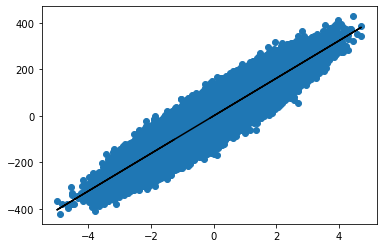

Well Done!
Wall time: 12.7 s


In [324]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1


theta0, theta1 = Gradient_Method_Ex1(alpha, x, y, ep, max_iter=1000,
                                     steps=25)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 

# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0)
    
# We plot  the data and the line we have computed, i.e.: Y= Theta0 + Theta1 * X
for i in range(x.shape[1]):
        y_predict = theta0 + theta1*x 

pylab.plot(x,y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()
print("Well Done!")


# Exercice 2
#### Here we "upgrade", in the function Gradient_Method, the gradient using the "full batch", i.e. the full set of avalaible data
#### Implement  the "minibatch" idea.
#### Please call your function Gradient_Method_Ex2

## Computations with mini_batch gradient descent implementation


| Sample   | Theta 0 Ini | Theta 1 Ini | Theta 0 Fin  | Theta 1 Fin | Steps | eps  | alpha | time   | Error    | J minus E | Ini J    | Iter |
| -------- | ----------- | ----------- | ------------ | ----------- | ----- | ---- | ----- | ------ | -------- | --------- | -------- | ---- |
| 100      | 0.84749002  | 0.76545551  | \-2.9354679  | 43.00882074 | 25    | 0.01 | 0.01  | 316ms  | 139865.5 | 0.077732  | 322949.9 | 94   |
| 1000     | 0.35807687  | 0.90481815  | 0.72234296   | 82.07779906 | 25    | 0.01 | 0.01  | 388ms  | 2110144  | 5509918   | 7620063  | 13   |
| 10000    | 0.29877773  | 0.95662139  | \-0.98469815 | 8.98194662  | 25    | 0.01 | 0.01  | 760ms  | 12271438 | 672314.7  | 12943753 | 2    |
| 100000   | 0.57125933  | 0.78206484  | \-0.42785141 | 80.49694913 | 25    | 0.01 | 0.01  | 4.67s  | 1.23E+08 | 6.13E+08  | 7.36E+08 | 1    |
| 1000000  | 0.0847954   | 0.39305143  | 0.52290853   | 80.26752228 | 25    | 0.01 | 0.01  | 47.2s  | 1.22E+09 | 6.53E+09  | 7.75E+09 | 1    |
| 10000000 | 0.14385065  | 0.6742215   | 0.64983568   | 75.68272054 | 25    | 0.01 | 0.01  | 7m 41s | 1.22E+10 | 5.6E+10   | 6.82E+10 | 1    |

#### Implementing mini_batch gradient descent, gives less number of iterations as well as time required is less compared to batch and stochastic algorithm.
#### Batch size: 10

In [432]:
def Gradient_Method_Ex2(alpha, x, y, eps=0.0001, max_iter=1000, steps=10):
    HasConverged = False
    iter = 0
    m = x.shape[0] # number of samples    
    
    print("Number of Samples:", m)

    # initial value for theta  : chosen randomly
    # Theta=(Theta0[0],Theta1[0]) in IR^2
    # Theta0[0] -> t0 in IR
    # Theta1[0] -> t1 in IR
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])
    print("Initial Value of Thetao[0] =", t0)
    print("Initial Value of Theta1[0] =", t1)

    # The total error, J(theta)  is defined as
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
    print("Total Initial Error J: ", J)

    # The Iteration Loop
    while not HasConverged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        # following: 
        
        for i in range(0, m, m//10):
            for j in range(i, i+(m//10)):
                grad0 = 0.1 * sum([(t0 + t1*x[j] - y[j])]) 
                grad1 = 0.1 * sum([(t0 + t1*x[j] - y[j])*x[j]])

                # We update the theta_temp
                temp0 = t0 - alpha * grad0        
                temp1 = t1 - alpha * grad1


                # We update theta
                t0 = temp0
                t1 = temp1

        # We compute Mean Squared Error
        e = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)]) 

        if abs(J-e) <= eps:
            print('Converged, iterations: ', iter)
            HasConverged = True

        if (iter % steps ==0): print("Iter: ", iter, 
                                     " Error:",e, 
                                     " J-e:",abs(J-e))    

        J = e      # We update error 
        iter += 1  # We update iter

        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1

In [443]:
if __name__ == '__main__':

#   We create the Data     
    x, y = make_regression(n_samples=10000000, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    print('x.shape = %s y.shape = %s' %(x.shape, y.shape))    
    
# We choose some hyperparameters  
    alpha = 0.01 # learning rate
    ep = 0.01 # convergence criteria     

x.shape = (10000000, 1) y.shape = (10000000,)


Number of Samples: 10000000
Initial Value of Thetao[0] = [0.14385065]
Initial Value of Theta1[0] = [0.6742215]
Total Initial Error J:  [6.82250468e+10]
Iter:  0  Error: [1.22498444e+10]  J-e: [5.59752023e+10]
Converged, iterations:  1
Computed value
Theta0 = [0.64983568]       Theta1 = [75.68272054]
Intercept = -0.0024287020354418695 Slope = 75.51124926556906
Error on Slope [-0.17147127]
Error on Intercept [-0.65226438]


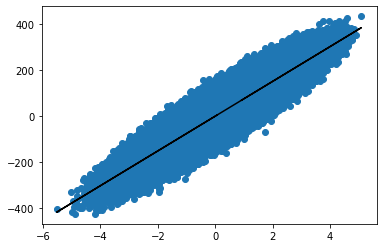

Well Done!
Wall time: 7min 41s


In [444]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1


theta0, theta1 = Gradient_Method_Ex2(alpha, x, y, ep, max_iter=1000,
                                     steps=25)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 

# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0)
    
# We plot  the data and the line we have computed, i.e.: Y= Theta0 + Theta1 * X
for i in range(x.shape[1]):
        y_predict = theta0 + theta1*x 

pylab.plot(x,y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()
print("Well Done!")